<a href="https://colab.research.google.com/github/Pranjali-sambare/Predictive-Rainfall-Analysis/blob/main/Rainfall_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rainfall.csv to Rainfall (1).csv


Data collection and Processing

In [ ]:
df = pd.read_csv("Rainfall.csv")
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
df.shape

(366, 12)

In [ ]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

Exploratory Data Analysis

In [ ]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
p = df['day'] = df['day'].fillna(df['day'].mean())
print(p)

0       1
1       2
2       3
3       4
4       5
       ..
361    27
362    28
363    29
364    30
365    31
Name: day, Length: 365, dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
v = df['day'] = le.fit_transform(df['day'])
print(v)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3
  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

In [ ]:
data = df.drop(columns=["day"])

In [ ]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# converting the yes & no to 1 and 0 respectively
df["rainfall"] = df["rainfall"].map({"yes": 1, "no": 0})

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed
0,1006.472296,34.529309,29.767616,18.407093,10.515250,78.400136,5.076868,4.957163,7.920144
1,1007.661587,31.077208,21.157557,17.848483,15.843557,53.974684,1.046063,4.767592,2.950197
2,1000.904254,34.571723,21.979142,19.122347,17.755771,55.711659,5.661984,9.804716,2.583288
3,1017.433671,34.047675,20.211340,17.886709,14.421782,69.808359,3.571149,9.176926,17.213362
4,1017.179728,32.396566,25.059096,15.726717,10.070415,76.880708,1.239679,7.146880,8.760113


In [ ]:
data.shape

(365, 11)

In [ ]:
# setting plot style for all the plots
sns.set(style="whitegrid")

In [ ]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1013.764658,26.176164,23.735068,21.881644,19.973425,80.161644,71.106849,4.413699,101.506849,21.536986
std,6.409697,5.979563,5.635701,5.596385,5.997768,10.071648,21.824024,3.938285,81.723724,10.069712
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,1013.000000,27.700000,25.400000,23.700000,21.900000,80.000000,80.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.500000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data placeholder (Replace with your actual data)
data = pd.DataFrame({
    'pressure': np.random.uniform(1000, 1020, 100),
    'maxtemp': np.random.uniform(25, 35, 100),
    'temparature': np.random.uniform(20, 30, 100),
    'mintemp': np.random.uniform(15, 20, 100),
    'dewpoint': np.random.uniform(10, 20, 100),
    'humidity': np.random.uniform(50, 80, 100),
    'cloud': np.random.uniform(0, 8, 100),
    'sunshine': np.random.uniform(0, 10, 100),
    'windspeed': np.random.uniform(0, 20, 100)
})

<ipython-input-5-28df30d8ac0f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pressure_temp.index, y=avg_pressure_temp.values, palette="Blues_d")


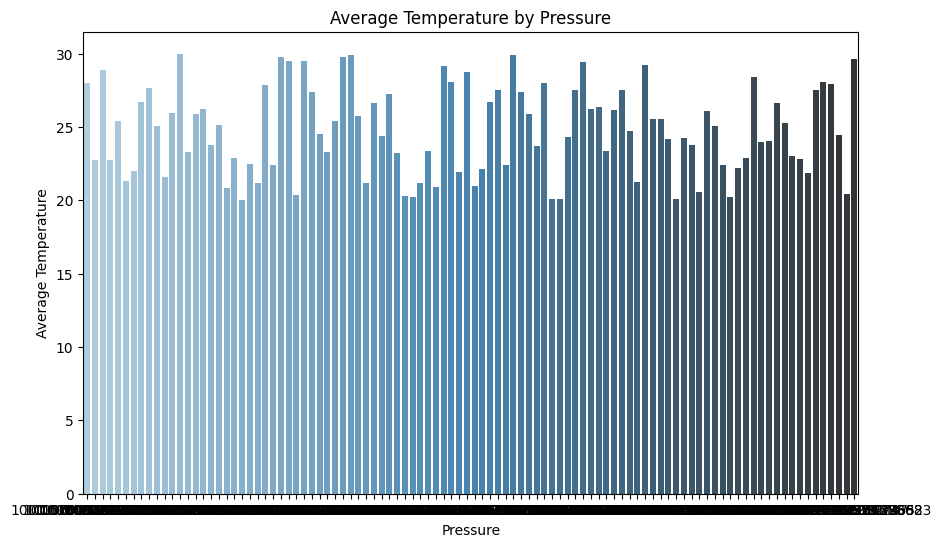

In [ ]:
# Bar Chart for numeric data
# Example: Average temperature by pressure
avg_pressure_temp = data.groupby('pressure')['temparature'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pressure_temp.index, y=avg_pressure_temp.values, palette="Blues_d")
plt.title('Average Temperature by Pressure')
plt.xlabel('Pressure')
plt.ylabel('Average Temperature')
plt.show()

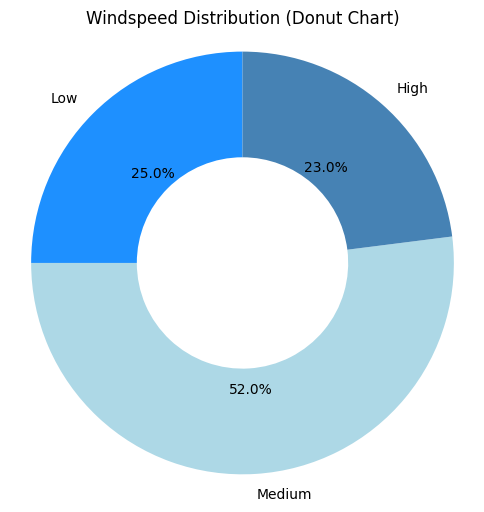

In [ ]:
# Donut Chart
# Example: Proportions of windspeed categories
windspeed_categories = ['Low', 'Medium', 'High']
windspeed_count = [len(data[data['windspeed'] < 5]),
                   len(data[(data['windspeed'] >= 5) & (data['windspeed'] < 15)]),
                   len(data[data['windspeed'] >= 15])]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(windspeed_count, labels=windspeed_categories, autopct='%1.1f%%', startangle=90, colors=['#1E90FF','#ADD8E6','#4682B4'], wedgeprops={'width': 0.5})
plt.title('Windspeed Distribution (Donut Chart)')
plt.axis('equal')
plt.show()

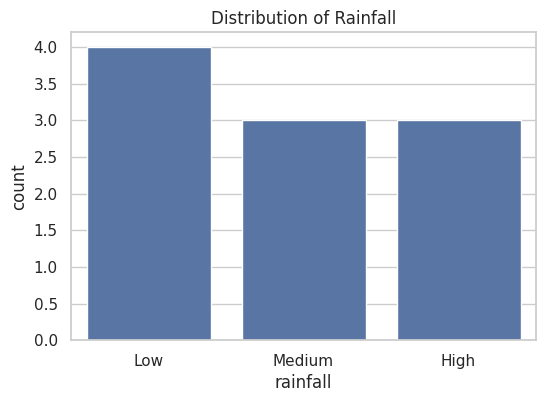

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data placeholder (Replace with your actual data)
data = pd.DataFrame({
    'rainfall': ['Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Low']
})

# Plotting
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()


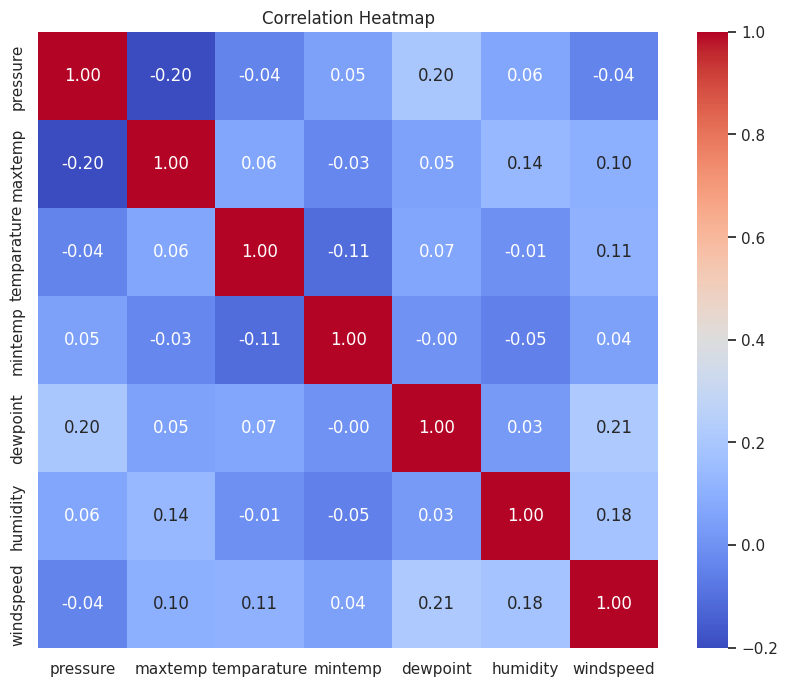

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data placeholder (Replace with your actual data)
data = pd.DataFrame({
    'pressure': np.random.uniform(1000, 1020, 100),
    'maxtemp': np.random.uniform(25, 35, 100),
    'temparature': np.random.uniform(20, 30, 100),
    'mintemp': np.random.uniform(15, 25, 100),
    'dewpoint': np.random.uniform(10, 20, 100),
    'humidity': np.random.uniform(50, 100, 100),
    'windspeed': np.random.uniform(5, 15, 100)
})

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


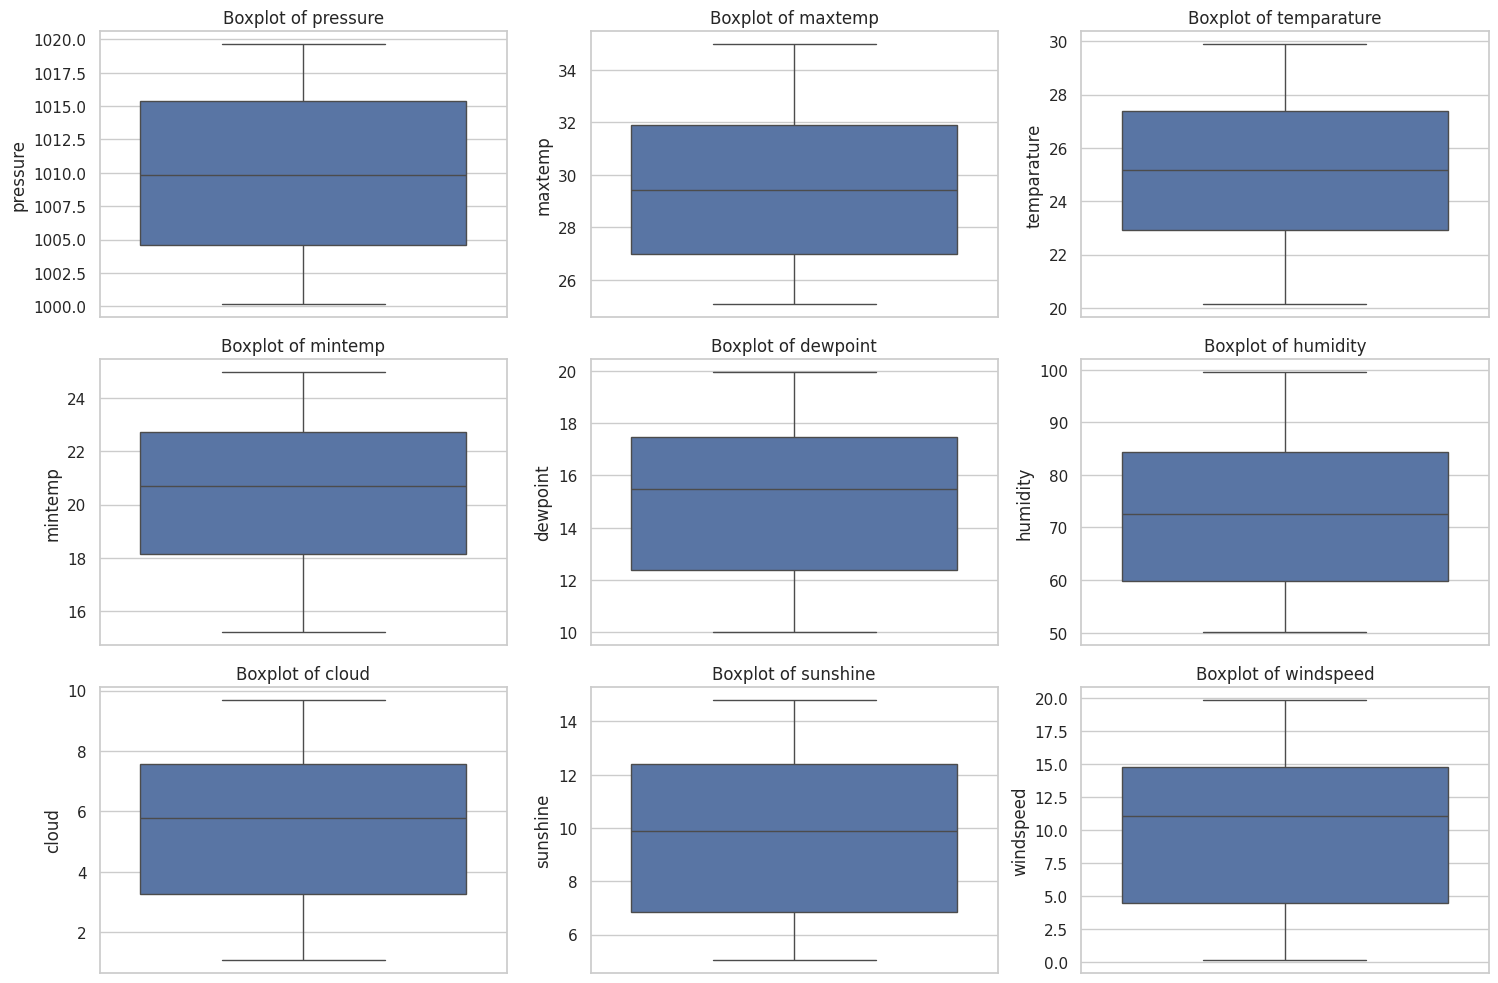

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data placeholder (Replace with your actual data)
data = pd.DataFrame({
    'pressure': np.random.uniform(1000, 1020, 100),
    'maxtemp': np.random.uniform(25, 35, 100),
    'temparature': np.random.uniform(20, 30, 100),
    'mintemp': np.random.uniform(15, 25, 100),
    'dewpoint': np.random.uniform(10, 20, 100),
    'humidity': np.random.uniform(50, 100, 100),
    'cloud': np.random.uniform(1, 10, 100),
    'sunshine': np.random.uniform(5, 15, 100),
    'windspeed': np.random.uniform(0, 20, 100)
})

# Plotting Boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])  # Adjusted for vertical boxplot
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


Machine Learning Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Handle missing values
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mean())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

In [ ]:
# Encode categorical 'rainfall' as binary (1 for 'yes', 0 for 'no')
df['rainfall_binary'] = LabelEncoder().fit_transform(df['rainfall'])

In [ ]:
# Add a rainfall category based on sunshine levels
df['rainfall_category'] = pd.cut(df['sunshine'], bins=[-1, 2, 6, 15], labels=['Heavy Rain', 'Moderate Rain', 'Light Rain'])

In [ ]:
# Split into training and testing sets
X_train, X_test, y_linear_train, y_linear_test = train_test_split(X, y_linear, test_size=0.2, random_state=42)
_, _, y_binary_train, y_binary_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
_, _, y_category_train, y_category_test = train_test_split(X, y_category, test_size=0.2, random_state=42)

linear Regression - How much rainfall will occur tomorrow?



In [ ]:
# Features and target variables
X = df[['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
                   'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
y_linear = df['rainfall_binary']  # Using binary rainfall as a placeholder for regression
y_binary = df['rainfall_binary']
y_category = df['rainfall_category']

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_linear_train)

LinearRegression()

In [ ]:
# "How much rainfall will occur tomorrow?"
rainfall_pred = linear_model.predict(X_test)
print(f"Prediction for rainfall : {rainfall_pred[0]} mm")

Prediction for rainfall : 1.0015996917540044 mm


Logistic regression -
1. Will it rain tomorrow?
2. "What category does tomorrow's rainfall fall into?

In [ ]:
#  Will it rain?
logistic_model_binary = LogisticRegression()
logistic_model_binary.fit(X_train, y_binary_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
binary_pred = logistic_model_binary.predict(X_test)
binary_prob = logistic_model_binary.predict_proba(X_test)
print(f"Prediction: {'Yes' if binary_pred[0] == 1 else 'No'} with probability {binary_prob[0][1]:.2f}")

Prediction: Yes with probability 0.97


In [ ]:
# 1. Rainfall category
logistic_model_category = LogisticRegression(multi_class='multinomial', max_iter=1000)
logistic_model_category.fit(X_train, y_category_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

What category does tomorrow's rainfall fall into?

In [ ]:
# 1. category Rain
category_pred = logistic_model_category.predict(X_test)
print(f"Rainfall Category Prediction: {category_pred[0]}")

Rainfall Category Prediction: Heavy Rain


In [ ]:
# 2. Evaluation (optional)
print("Accuracy Score:", accuracy_score(y_binary_test, logistic_model_binary.predict(X_test)))

print("Logistic Regression Report:")
print(classification_report(y_category_test, logistic_model_category.predict(X_test)))

Accuracy Score: 0.7432432432432432
Logistic Regression Report:
               precision    recall  f1-score   support

   Heavy Rain       1.00      1.00      1.00        36
   Light Rain       0.95      0.95      0.95        20
Moderate Rain       0.94      0.94      0.94        18

     accuracy                           0.97        74
    macro avg       0.96      0.96      0.96        74
 weighted avg       0.97      0.97      0.97        74

